# Classification de mammographies par CNN : Cancer vs Non-Cancer

## 1-Import des librairies utiles 


In [ ]:
import os
import random
import sys
import cv2
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

## 2- Choix du dataset (petit ou grand)

In [ ]:
# Petit dataset

folder_path = r'breast_cancer_public_data-main\data_2'

# Préparation des données d'entraînement
classes = ["Negative", "Cancer"]
dataset = []

for label_index, class_label in enumerate(classes):
    class_path = os.path.join(folder_path, class_label)
    
    if not os.path.isdir(class_path):
        print(f"Répertoire introuvable : {class_path}")
        continue

    for img_file in tqdm.tqdm(os.listdir(class_path), desc=f"Chargement {class_label}"):
        img_path = os.path.join(class_path, img_file)

        # Vérifie que c'est bien une image
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Impossible de lire : {img_path}")
            continue

        img = cv2.resize(img, (224, 224))
        dataset.append((img, label_index))

X_images = []
y_images = []
for img, label in dataset:
    X_images.append(img)
    y_images.append(label)

X = np.array(X_images) / 255.0
y = np.array(y_images)

Chargement Cancer: 100%|██████████| 410/410 [00:04<00:00, 90.52it/s]


array([[[0.16862745, 0.16862745, 0.16862745],
        [0.17647059, 0.17647059, 0.17647059],
        [0.18431373, 0.18431373, 0.18431373],
        ...,
        [0.07843137, 0.07843137, 0.07843137],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.0745098 , 0.0745098 , 0.0745098 ]],

       [[0.23529412, 0.23529412, 0.23529412],
        [0.24313725, 0.24313725, 0.24313725],
        [0.25098039, 0.25098039, 0.25098039],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.09019608, 0.09019608, 0.09019608],
        [0.08627451, 0.08627451, 0.08627451]],

       [[0.25490196, 0.25490196, 0.25490196],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        [0.26666667, 0.26666667, 0.26666667],
        ...,
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.07058824, 0.07058824, 0.07058824]],

       ...,

       [[0.0745098 , 0.0745098 , 0.0745098 ],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08627451, 0

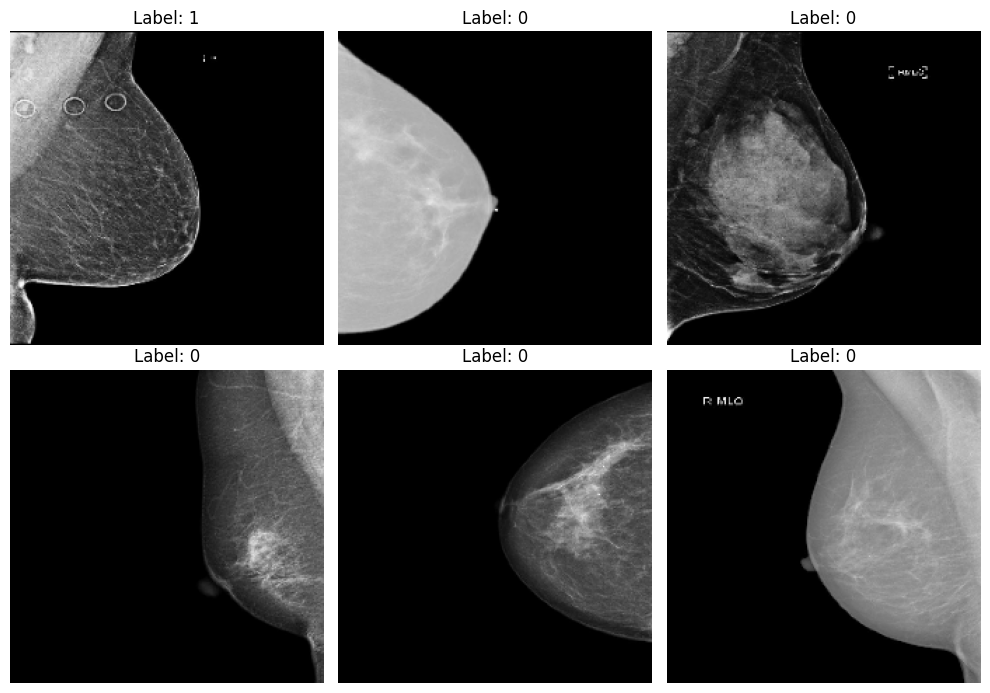

In [22]:
# Sample Visualization
num_samples = 6
random_samples = np.random.choice(len(X), num_samples, replace=False)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, idx in enumerate(random_samples):
    ax = axes[i // 3, i % 3]
    ax.imshow(X[idx], cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

: 

In [8]:
X_test.shape

(164, 224, 224, 3)

In [9]:
X_train.shape

(656, 224, 224, 3)

In [10]:
model = Sequential()
#Conv2D(100, (3, 3)) 100 kernel de dimension 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.summary()

c:\Users\laure\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 100)    │        57,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,163,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,240,357 (8.55 MB)

 Trainable params: 2,240,357 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6936 - loss: 0.5937 - val_accuracy: 0.8598 - val_loss: 0.4197
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 918ms/step - accuracy: 0.8826 - loss: 0.3113 - val_accuracy: 0.7927 - val_loss: 0.4974
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 911ms/step - accuracy: 0.9055 - loss: 0.2421 - val_accuracy: 0.8963 - val_loss: 0.3371
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 971ms/step - accuracy: 0.9329 - loss: 0.1767 - val_accuracy: 0.9146 - val_loss: 0.3149
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 964ms/step - accuracy: 0.9451 - loss: 0.1440 - val_accuracy: 0.8780 - val_loss: 0.3097
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9665 - loss: 0.1230 - val_accuracy: 0.9268 - val_loss: 0.4090
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9619 - loss: 0.0963 - val_accuracy: 0.9146 - val_loss: 0.4272
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 977ms/step - accuracy: 0.9466 - loss: 0.1059 - val_accuracy: 0.8

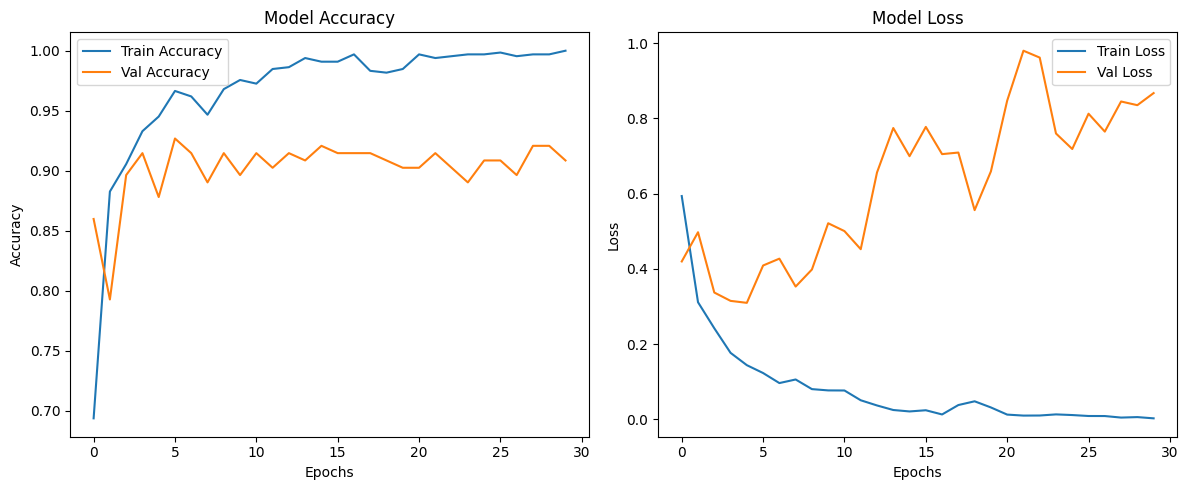

In [13]:
# Graphs and Metrics
plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()